In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = sns.load_dataset('titanic')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [49]:
def check_df(dataframe, head=5):
    print('######################## Shape ########################')
    print(dataframe.shape, '\n')
    print('######################## Types ########################')
    print(dataframe.dtypes, '\n')
    print('######################## Head ########################')
    print(dataframe.head(head), '\n')
    print('######################## Tail ########################')
    print(dataframe.tail(head), '\n')
    print('######################## NA ########################')
    print(dataframe.isnull().sum(), '\n')

In [50]:
check_df(df)

######################## Shape ########################
(891, 15) 

######################## Types ########################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object 

######################## Head ########################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  wo

## catch categorical variables

In [89]:
cat_cols = [col for col in df.columns if str(df[col].dtype) in ['category', 'object', 'bool']]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [90]:
num_but_cat = [col for col in df.columns if str(df[col].dtype) in ['int64', 'float64'] and df[col].nunique() < 10]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [92]:
cat_but_car = [col for col in df.columns if str(df[col].dtype) in ['category', 'object'] and df[col].nunique() >20]
cat_but_car

[]

In [94]:
cat_cols = cat_cols + num_but_cat
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [97]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0,1,1,0,0


In [99]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

# Cat Summary Function

In [138]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))
    
    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show()
        
    print('######################################################################\n')

In [133]:
cat_summary(df, 'sex')

        sex  Ratio
male    577  64.76
female  314  35.24
######################################################################



In [130]:
for col in cat_cols:
    cat_summary(df, col)

        sex  Ratio
male    577  64.76
female  314  35.24
######################################################################

   embarked  Ratio
S       644  72.28
C       168  18.86
Q        77   8.64
######################################################################

        class  Ratio
Third     491  55.11
First     216  24.24
Second    184  20.65
######################################################################

       who  Ratio
man    537  60.27
woman  271  30.42
child   83   9.32
######################################################################

       adult_male  Ratio
True          537  60.27
False         354  39.73
######################################################################

   deck  Ratio
C    59   6.62
B    47   5.27
D    33   3.70
E    32   3.59
A    15   1.68
F    13   1.46
G     4   0.45
######################################################################

             embark_town  Ratio
Southampton          644  72.28
Cherbourg           

        sex  Ratio
male    577  64.76
female  314  35.24
######################################################################



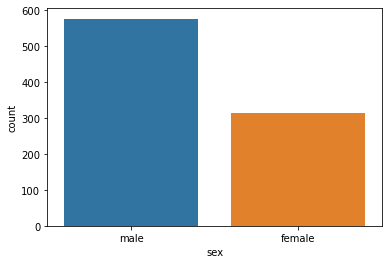

In [136]:
cat_summary(df, 'sex', plot=True)

        sex  Ratio
male    577  64.76
female  314  35.24


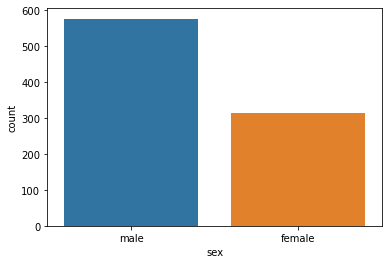

######################################################################

   embarked  Ratio
S       644  72.28
C       168  18.86
Q        77   8.64


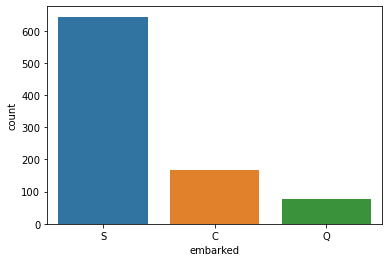

######################################################################

        class  Ratio
Third     491  55.11
First     216  24.24
Second    184  20.65


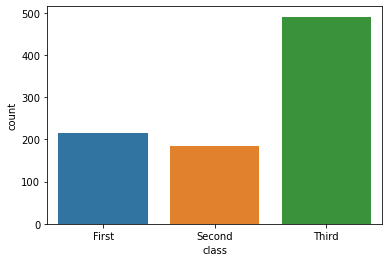

######################################################################

       who  Ratio
man    537  60.27
woman  271  30.42
child   83   9.32


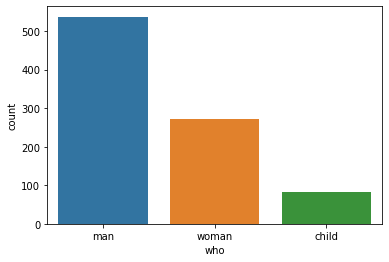

######################################################################

       adult_male  Ratio
True          537  60.27
False         354  39.73


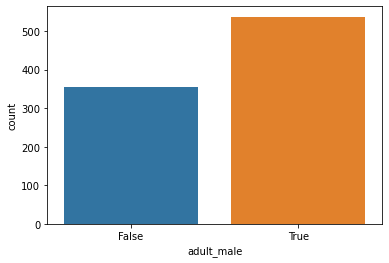

######################################################################

   deck  Ratio
C    59   6.62
B    47   5.27
D    33   3.70
E    32   3.59
A    15   1.68
F    13   1.46
G     4   0.45


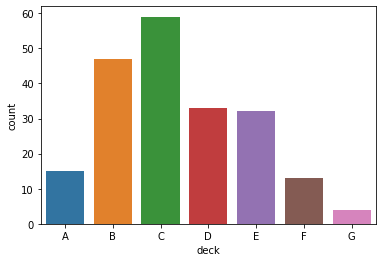

######################################################################

             embark_town  Ratio
Southampton          644  72.28
Cherbourg            168  18.86
Queenstown            77   8.64


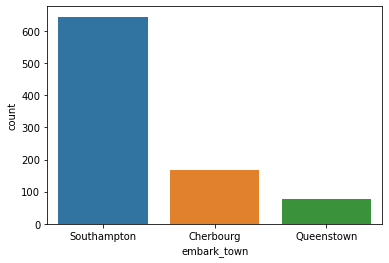

######################################################################

     alive  Ratio
no     549  61.62
yes    342  38.38


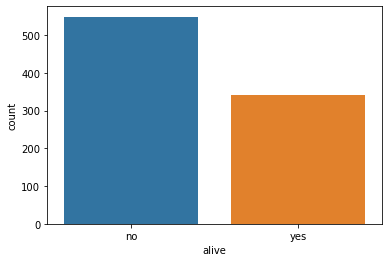

######################################################################

       alone  Ratio
True     537  60.27
False    354  39.73


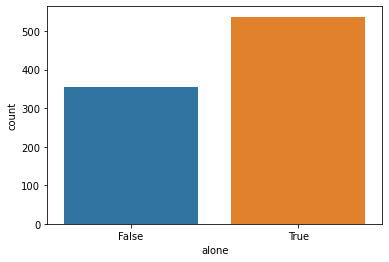

######################################################################

   survived  Ratio
0       549  61.62
1       342  38.38


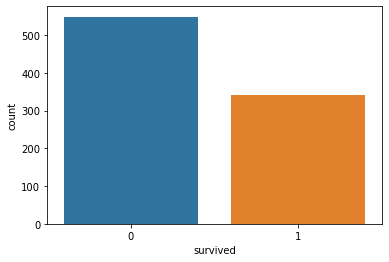

######################################################################

   pclass  Ratio
3     491  55.11
1     216  24.24
2     184  20.65


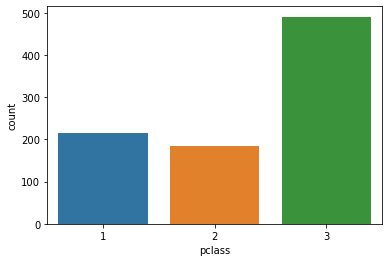

######################################################################

   sibsp  Ratio
0    608  68.24
1    209  23.46
2     28   3.14
4     18   2.02
3     16   1.80
8      7   0.79
5      5   0.56


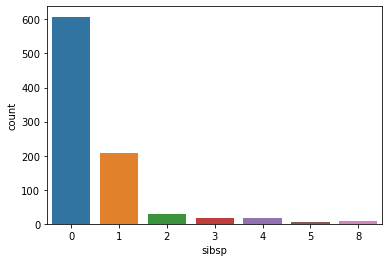

######################################################################

   parch  Ratio
0    678  76.09
1    118  13.24
2     80   8.98
5      5   0.56
3      5   0.56
4      4   0.45
6      1   0.11


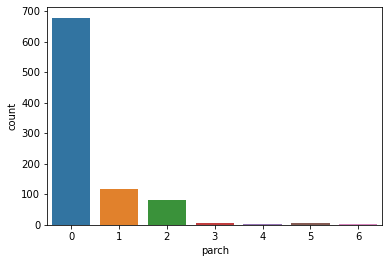

######################################################################

   survived  Ratio
0       549  61.62
1       342  38.38


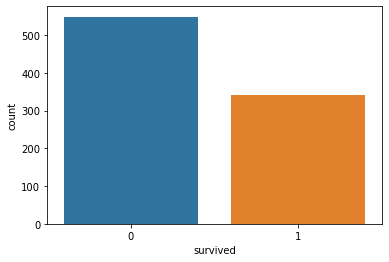

######################################################################

   pclass  Ratio
3     491  55.11
1     216  24.24
2     184  20.65


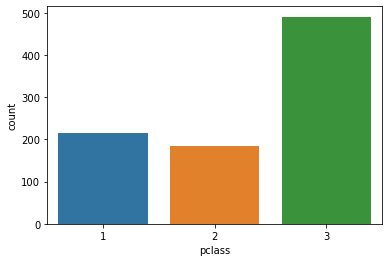

######################################################################

   sibsp  Ratio
0    608  68.24
1    209  23.46
2     28   3.14
4     18   2.02
3     16   1.80
8      7   0.79
5      5   0.56


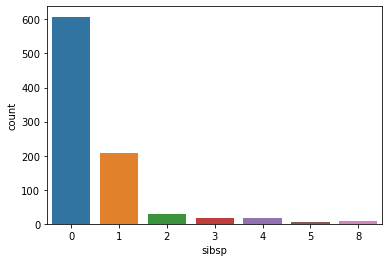

######################################################################

   parch  Ratio
0    678  76.09
1    118  13.24
2     80   8.98
5      5   0.56
3      5   0.56
4      4   0.45
6      1   0.11


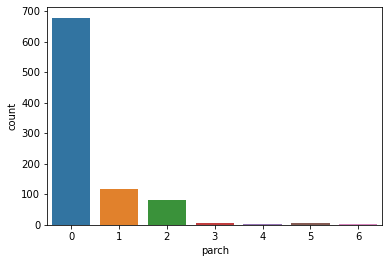

######################################################################



In [139]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [141]:
num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]

In [144]:
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

# Num Summary Funciton

In [158]:
def num_summary(dataframe, numerical_col, plot=False):
    print(numerical_col.upper())
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()
       
    print('################################################################\n')

AGE
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


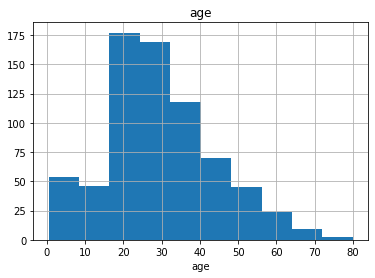

################################################################



In [159]:
num_summary(df, 'age', plot=True)

AGE
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


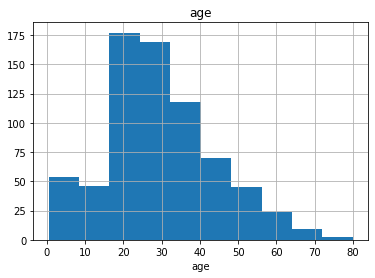

################################################################

FARE
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: fare, dtype: float64


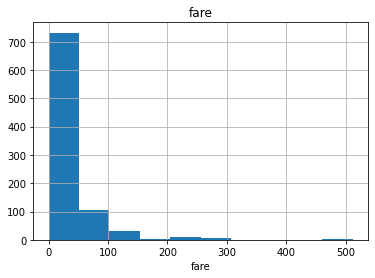

################################################################



In [160]:
for col in num_cols:
    num_summary(df, col, plot=True)

# Grab All Columns

In [168]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in df.columns if str(df[col].dtype) in ['category', 'object', 'bool']]
    num_but_cat = [col for col in df.columns if str(df[col].dtype) in ['int64', 'float64'] and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if str(df[col].dtype) in ['category', 'object'] and df[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    
    return cat_cols, num_cols, cat_but_car
    

In [169]:
grab_col_names(df)

Observations: 891
Variables: 15
Categorical Variables: 13
Numerical Variables: 2
Numerical But Categorical Variables: 4
Categorical But Cardinal: 0


(['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [170]:
cat_cols_df, num_cols_df, cat_but_car_df = grab_col_names(df)

Observations: 891
Variables: 15
Categorical Variables: 13
Numerical Variables: 2
Numerical But Categorical Variables: 4
Categorical But Cardinal: 0


In [171]:
cat_cols_df

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [172]:
num_cols_df

['age', 'fare']

In [173]:
cat_but_car_df

[]